In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Data preprocessing

In [3]:
df = pd.read_csv('SensorData/2Sens.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864864 entries, 0 to 864863
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   accX          864864 non-null  float64
 1   accY          864864 non-null  float64
 2   accZ          864864 non-null  float64
 3   gyrX          864864 non-null  float64
 4   gyrY          864864 non-null  float64
 5   gyrZ          864864 non-null  float64
 6   latitude      864864 non-null  float64
 7   longtitude    864864 non-null  float64
 8   speed         864864 non-null  int64  
 9   vehicleType   864864 non-null  int64  
 10  activityMode  864864 non-null  int64  
 11  timestamp     864864 non-null  object 
dtypes: float64(8), int64(3), object(1)
memory usage: 79.2+ MB


In [5]:
df['activityMode'].value_counts()

6    720323
5    139471
7      5070
Name: activityMode, dtype: int64

In [6]:
df.head()

accX      accY      accZ      gyrX     gyrY      gyrZ  latitude  \
0  0.018576 -0.008798  1.005135  0.001625 -0.00306  0.004771  59.87523   
1  0.018576 -0.008798  1.005135  0.001625 -0.00306  0.004771  59.87523   
2  0.018576 -0.008798  1.005135  0.001625 -0.00306  0.004771  59.87523   
3  0.018576 -0.008798  1.005135  0.001625 -0.00306  0.004771  59.87523   
4  0.008870  0.007253  1.000837  0.001625 -0.00306  0.004771  59.87523   

   longtitude  speed  vehicleType  activityMode         timestamp  
0   29.899586      0            1             5  00:00:00.0048120  
1   29.899586      0            1             5  00:00:00.0058040  
2   29.899586      0            1             5  00:00:00.0102060  
3   29.899586      0            1             5  00:00:00.0108090  
4   29.899586      0            1             5  00:00:00.0118610

In [7]:
df.describe().T

count       mean           std        min        25%  \
accX          864864.0  -0.005912  7.999129e-02  -0.822671  -0.045583   
accY          864864.0   0.001561  5.684004e-02  -0.697309  -0.024884   
accZ          864864.0   1.003935  5.017684e-02   0.212520   0.981556   
gyrX          864864.0  -0.001832  1.976215e-02  -0.312360  -0.010592   
gyrY          864864.0  -0.002131  5.267433e-02  -0.621256  -0.001228   
gyrZ          864864.0   0.002675  2.653891e-02  -0.276838  -0.008057   
latitude      864864.0  59.875230  7.815975e-14  59.875230  59.875230   
longtitude    864864.0  29.899586  0.000000e+00  29.899586  29.899586   
speed         864864.0   0.000000  0.000000e+00   0.000000   0.000000   
vehicleType   864864.0   1.000000  0.000000e+00   1.000000   1.000000   
activityMode  864864.0   5.844599  3.781221e-01   5.000000   6.000000   

                    50%        75%        max  
accX          -0.002409   0.034714   0.620041  
accY          -0.000143   0.024958   0.654189  
accZ           1.003945   1.026314   1.875643  
gyrX          -0.001429   0.007123   0.351040  
gyrY           0.004270   0.009157   0.518618  
gyrZ           0.001106   0.010269   0.426268  
latitude      59.875230  59.875230  59.875230  
longtitude    29.899586  29.899586  29.899586  
speed          0.000000   0.000000   0.000000  
vehicleType    1.000000   1.000000   1.000000  
activityMode   6.000000   6.000000   7.000000

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')

In [9]:
df.drop(['speed', 'vehicleType', 'latitude', 'longtitude'], axis=1, inplace=True)

In [10]:
df.loc[:, 'activityMode'] = df.loc[:, 'activityMode'] - 5 # [5, 6, 7] -> [0, 1, 2]

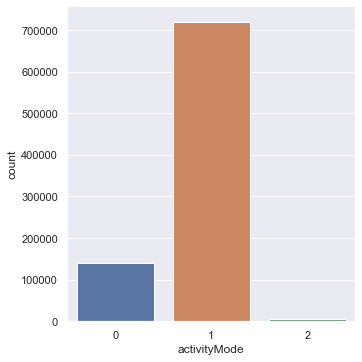

In [11]:
sns.catplot(x='activityMode', kind='count', data=df)

In [12]:
df.head()

accX      accY      accZ      gyrX     gyrY      gyrZ  activityMode  \
0  0.018576 -0.008798  1.005135  0.001625 -0.00306  0.004771             0   
1  0.018576 -0.008798  1.005135  0.001625 -0.00306  0.004771             0   
2  0.018576 -0.008798  1.005135  0.001625 -0.00306  0.004771             0   
3  0.018576 -0.008798  1.005135  0.001625 -0.00306  0.004771             0   
4  0.008870  0.007253  1.000837  0.001625 -0.00306  0.004771             0   

                   timestamp  
0 1900-01-01 00:00:00.004812  
1 1900-01-01 00:00:00.005804  
2 1900-01-01 00:00:00.010206  
3 1900-01-01 00:00:00.010809  
4 1900-01-01 00:00:00.011861

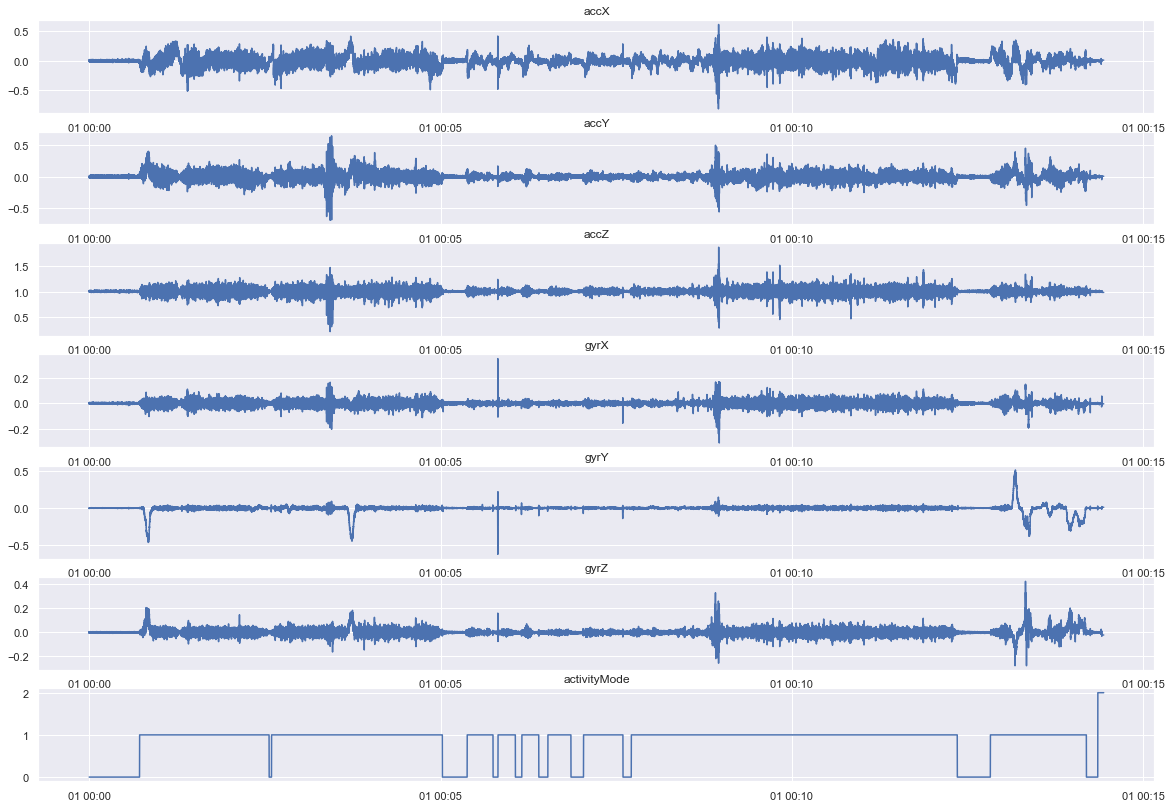

In [13]:
fig, ax = plt.subplots(7, 1, figsize=(20, 14))
for i, column in enumerate(df.columns[:-1]):
    ax[i].plot(df['timestamp'], df[column])
    ax[i].set_title(column)

In [1]:
df.to_csv('SensorData/sens.csv', index=False)

NameError: name 'df' is not defined